In [1]:
import sys
import os
sys.path.append(os.path.abspath("../")) #Add parent directory

## Load data

In [2]:
from Modular_DL.data_loading import load_nifti, resample_image, convert_to_ras
from Modular_DL.data_normalization import z_score_normalize
import numpy as np
import SimpleITK as sitk
import torch
import nibabel as nib
import os


# The next commented code is to convert all the images to the same voxel space

¡¡¡¡CONVERT THIS TO A .PY FILE!!!

In [ ]:
# folder_path = r"C:\Users\User\Desktop\UDG_old_pc\UDG\Subjects\MISSSSSA\Final_project\TrainingValidationTestSets\Test_Set".replace("\\", "/")
# output_folder = r"C:\Users\User\Desktop\UDG_old_pc\UDG\Subjects\MISSSSSA\Final_project\TrainingValidationTestSets\Test_resampled".replace("\\", "/")
# os.makedirs(output_folder, exist_ok= True)
# #target spacing for now: 1,1,1
# target_spacing = (1.0, 1.0, 1.0)
# reference_shape = None
# reference_affine = None
# consistent = True

# for root, _, files in os.walk(folder_path):
#     for file in files:
#         if file.endswith(".nii") or file.endswith(".nii.gz"):
#             file_path = os.path.join(root, file).replace("\\", "/")

#             # Load original image
#             data, original_image, voxel_spacing = load_nifti(file_path)

#             # Create a SimpleITK image
#             image_sitk = sitk.GetImageFromArray(data)
#             image_sitk.SetSpacing(voxel_spacing)  # Set the original spacing
#             image_sitk.SetDirection(original_image.GetDirection())  # Copy original direction
#             image_sitk.SetOrigin(original_image.GetOrigin())  # Copy original origin

#             # Resample the image
#             is_label = 'seg' in file.lower()  # Determine if the file is a label (segmentation)
#             resampled_image = resample_image(image_sitk, target_spacing, is_label=is_label)

#             # Convert to RAS orientation
#             resampled_image = convert_to_ras(resampled_image)

#             # Save the resampled image
#             output_file_path = os.path.join(output_folder, f"resampled_{file}")
#             sitk.WriteImage(resampled_image, output_file_path)

#             print(f"Processed and saved: {output_file_path}")


Processed and saved: C:/Users/User/Desktop/UDG_old_pc/UDG/Subjects/MISSSSSA/Final_project/TrainingValidationTestSets/Test_resampled\resampled_IBSR_02.nii.gz
Processed and saved: C:/Users/User/Desktop/UDG_old_pc/UDG/Subjects/MISSSSSA/Final_project/TrainingValidationTestSets/Test_resampled\resampled_IBSR_10.nii.gz
Processed and saved: C:/Users/User/Desktop/UDG_old_pc/UDG/Subjects/MISSSSSA/Final_project/TrainingValidationTestSets/Test_resampled\resampled_IBSR_15.nii.gz


# Load images 

## Training images

In [3]:
import re
folder = fr"C:\Users\User\Desktop\UDG_old_pc\UDG\Subjects\MISSSSSA\Final_project\TrainingValidationTestSets\Training_resampled\TrainingImg\Registered".replace("\\", "/")
#\IBSR_01\Registered_IBSR_01.nii
image_training = []
label_training = []
for folder_name in os.listdir(folder):
    folder_img_path = os.path.join(folder, folder_name)
    for file_name in os.listdir(folder_img_path):
        
        #To extract segmentation
        if os.path.isdir(os.path.join(folder_img_path, file_name)):
            seg_folder_path = os.path.join(folder_img_path, file_name)
            for segment_file in os.listdir(seg_folder_path):
                if segment_file.startswith("Registered"):
                    seg_path = os.path.join(seg_folder_path,segment_file )
                    label_training.append(seg_path)
             
        #To extract intensity image
        else:
            match = re.search(r"Registered_IBSR_(\d+).nii", file_name)
            if match:
                image = match.group(0)
                image_dir = os.path.join(folder_img_path, image)
                image_training.append(image_dir)

print(f"Len training images: {len(image_training)}")
print(image_training)

print(f"Len training labels: {len(label_training)}")
print(label_training)

Len training images: 10
['C:/Users/User/Desktop/UDG_old_pc/UDG/Subjects/MISSSSSA/Final_project/TrainingValidationTestSets/Training_resampled/TrainingImg/Registered\\IBSR_01\\Registered_IBSR_01.nii', 'C:/Users/User/Desktop/UDG_old_pc/UDG/Subjects/MISSSSSA/Final_project/TrainingValidationTestSets/Training_resampled/TrainingImg/Registered\\IBSR_03\\Registered_IBSR_03.nii', 'C:/Users/User/Desktop/UDG_old_pc/UDG/Subjects/MISSSSSA/Final_project/TrainingValidationTestSets/Training_resampled/TrainingImg/Registered\\IBSR_04\\Registered_IBSR_04.nii', 'C:/Users/User/Desktop/UDG_old_pc/UDG/Subjects/MISSSSSA/Final_project/TrainingValidationTestSets/Training_resampled/TrainingImg/Registered\\IBSR_05\\Registered_IBSR_05.nii', 'C:/Users/User/Desktop/UDG_old_pc/UDG/Subjects/MISSSSSA/Final_project/TrainingValidationTestSets/Training_resampled/TrainingImg/Registered\\IBSR_06\\Registered_IBSR_06.nii', 'C:/Users/User/Desktop/UDG_old_pc/UDG/Subjects/MISSSSSA/Final_project/TrainingValidationTestSets/Training

# Validation images

In [4]:
import re
folder = fr"C:\Users\User\Desktop\UDG_old_pc\UDG\Subjects\MISSSSSA\Final_project\TrainingValidationTestSets\Validation_resampled\ValidationImg\Registered".replace("\\", "/")
#\IBSR_01\Registered_IBSR_01.nii
image_validation = []
label_validation = []
for folder_name in os.listdir(folder):
    folder_img_path = os.path.join(folder, folder_name)
    for file_name in os.listdir(folder_img_path):
        #print(file_name)
        #To extract segmentation
        if os.path.isdir(os.path.join(folder_img_path, file_name)):
            seg_folder_path = os.path.join(folder_img_path, file_name)
            for segment_file in os.listdir(seg_folder_path):
                if segment_file.startswith("Registered"):
                    seg_path = os.path.join(seg_folder_path,segment_file )
                    label_validation.append(seg_path)
             
        #To extract intensity image
        else:
            
            match = re.search(r"Registered_IBSR_(\d+)_val.nii", file_name)

            if match:
                image = match.group(0)
                image_dir = os.path.join(folder_img_path, image)
                image_validation.append(image_dir)

print(f"Len validation images: {len(image_validation)}")
print(image_validation)

print(f"Len validation labels: {len(label_validation)}")
print(label_validation)

Len validation images: 5
['C:/Users/User/Desktop/UDG_old_pc/UDG/Subjects/MISSSSSA/Final_project/TrainingValidationTestSets/Validation_resampled/ValidationImg/Registered\\IBSR_11\\Registered_IBSR_11_val.nii', 'C:/Users/User/Desktop/UDG_old_pc/UDG/Subjects/MISSSSSA/Final_project/TrainingValidationTestSets/Validation_resampled/ValidationImg/Registered\\IBSR_12\\Registered_IBSR_12_val.nii', 'C:/Users/User/Desktop/UDG_old_pc/UDG/Subjects/MISSSSSA/Final_project/TrainingValidationTestSets/Validation_resampled/ValidationImg/Registered\\IBSR_13\\Registered_IBSR_13_val.nii', 'C:/Users/User/Desktop/UDG_old_pc/UDG/Subjects/MISSSSSA/Final_project/TrainingValidationTestSets/Validation_resampled/ValidationImg/Registered\\IBSR_14\\Registered_IBSR_14_val.nii', 'C:/Users/User/Desktop/UDG_old_pc/UDG/Subjects/MISSSSSA/Final_project/TrainingValidationTestSets/Validation_resampled/ValidationImg/Registered\\IBSR_17\\Registered_IBSR_17_val.nii']
Len validation labels: 5
['C:/Users/User/Desktop/UDG_old_pc/UDG/

In [121]:
from Modular_DL.data_loader_dl import Dataloader_2D
from torch.utils.data import DataLoader

from Modular_DL.transformations_dl import get_training_transformations, get_validation_transformations


transformations_training = get_training_transformations()
transformations_val = get_validation_transformations()

dataset_train = Dataloader_2D(image_training, label_training, transformations_training)
dataloader_train = DataLoader(dataset_train, batch_size = 1, shuffle = True, num_workers=0)

dataset_val = Dataloader_2D(image_validation, label_validation, transformations_val)
dataloader_val = DataLoader(dataset_val, batch_size = 1, shuffle = True, num_workers=0)


### Plot some images

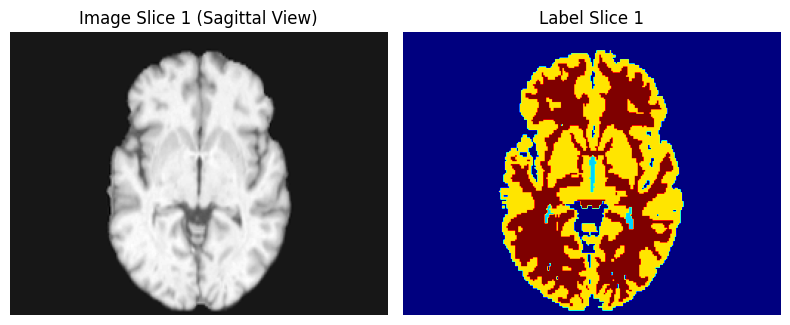

In [122]:
from Modular_DL.plot_dataloader_batch import plot_dataloader_sagittal
plot_dataloader_sagittal(dataloader_train)

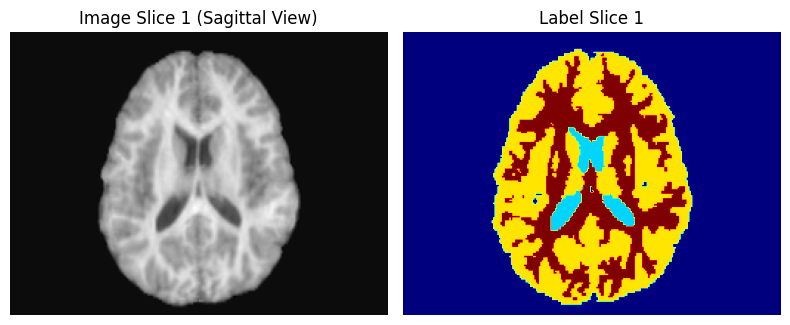

In [133]:
plot_dataloader_sagittal(dataloader_val)

In [5]:
for batch_idx, (images, labels) in enumerate(dataloader_train):
    batch_size = images.shape[0]
    #print(f"\n Batch {batch_idx + 1}/{len(dataloader_train)}")
    
    for img_idx in range(batch_size):

        image = images[img_idx]
        label = labels[img_idx]
        zero_sum_slices = []
        for slice_idx in range(images.shape[1]):
            slice_sum = image[:, :, slice_idx].contiguous().sum().item()
            if slice_sum == 0:
                zero_sum_slices.append(slice_idx)

        if zero_sum_slices:
            print(f"Warning Image  {img_idx + 1} in batch {batch_idx + 1}")

Warning Image  1 in batch 5
Warning Image  1 in batch 6
Warning Image  1 in batch 7
Warning Image  1 in batch 8
Warning Image  1 in batch 13
Warning Image  1 in batch 17
Warning Image  1 in batch 21
Warning Image  1 in batch 22
Warning Image  1 in batch 23
Warning Image  1 in batch 24
Warning Image  1 in batch 30
Warning Image  1 in batch 31
Warning Image  1 in batch 34
Warning Image  1 in batch 35
Warning Image  1 in batch 37
Warning Image  1 in batch 39
Warning Image  1 in batch 40
Warning Image  1 in batch 41
Warning Image  1 in batch 42
Warning Image  1 in batch 47
Warning Image  1 in batch 48
Warning Image  1 in batch 49
Warning Image  1 in batch 51
Warning Image  1 in batch 52
Warning Image  1 in batch 54
Warning Image  1 in batch 55
Warning Image  1 in batch 59
Warning Image  1 in batch 60
Warning Image  1 in batch 63
Warning Image  1 in batch 64
Warning Image  1 in batch 73
Warning Image  1 in batch 74
Warning Image  1 in batch 75
Warning Image  1 in batch 77
Warning Image  1 i

# Check if images have the same size and if they are not empty.
QUESTION:  SHOULD i REMOVE THE EMPTY SLICES?

In [6]:
import numpy as np

def check_dataloader_images(dataloader, loader_name):
    print(f"Checking {loader_name} loader...")
    for batch_idx, (images, labels) in enumerate(dataloader):
        batch_size = images.shape[0]
        print(f"\nBatch {batch_idx+1}/{len(dataloader)}:")
        print(f"  Batch size: {batch_size}")
        print(f"  Image dimensions: {images.shape[1:]}")  # Channels, height, width
        print(f"  Labels shape: {labels.shape}")

        # Iterate through all images in the batch
        for img_idx in range(batch_size):
            image = images[img_idx]
            label = labels[img_idx]

            # Check image shape
            if image.shape != label.shape:
                print(f"  WARNING: Shape mismatch for image {img_idx+1} in batch {batch_idx+1}")
                print(f"    Image shape: {image.shape}, Label shape: {label.shape}")

            # Check slices where all pixel values sum to zero
            zero_sum_slices = []
            for slice_idx in range(image.shape[1]):  # Assuming image shape is [C, H, W]
                slice_sum = image[:, :, slice_idx].sum().item()
                if slice_sum == 0:
                    zero_sum_slices.append(slice_idx)

            if zero_sum_slices:
                print(f"  WARNING: Image {img_idx+1} has slices with zero pixel intensity sum:")
                print(f"    Slices: {zero_sum_slices}")

            # Print stats for the image
            print(f"  Image {img_idx+1}:")
            print(f"    Min pixel value: {image.min().item()}")
            print(f"    Max pixel value: {image.max().item()}")
            print(f"    Data type: {image.dtype}")

# Example usage:
check_dataloader_images(dataloader_train, "Train")
check_dataloader_images(dataloader_val, "Validation")

Checking Train loader...

Batch 1/960:
  Batch size: 1
  Image dimensions: torch.Size([1, 192, 240])
  Labels shape: torch.Size([1, 192, 240])
    Image shape: torch.Size([1, 192, 240]), Label shape: torch.Size([192, 240])
    Slices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174,

In [7]:
batch = next(iter(dataloader_train)) #Get one batch of data
images, labels = batch #unpack into images and labels

print(f"Batch size: {images.shape[0]}")
print(f"Image dimensions: {images.shape[1:]}")
print(f"Labels shape: {labels.shape}")

for idx in range(images.shape[0]):
    print(f"Image {idx+1}")
    print(f"    Shape: {images[idx].shape}")
    print(f"    Min pixel value: {images[idx].min().item()}")
    print(f"    Max pixel value: {images[idx].max().item()}")
    print(f"    Data type: {images[idx].dtype}")

Batch size: 1
Image dimensions: torch.Size([1, 192, 240])
Labels shape: torch.Size([1, 192, 240])
Image 1
    Shape: torch.Size([1, 192, 240])
    Min pixel value: 0.0
    Max pixel value: 0.0
    Data type: torch.float32


# Vanilla Unet

In [134]:
import torch
import torch.optim as optim

from Modular_DL.vanilla_unet import UNet2D

from Modular_DL.loss_function import dice_loss
from Modular_DL.metrics import dice_coefficient
from Modular_DL.plot_losses import plot_losses
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = UNet2D(in_channels=1, out_channels=4, dropout_prob=0.5).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)  # Decay LR every 3 epochs by factor of 0.1

In [ ]:
num_epochs = 20
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    #Training

    model.train()
    total_train_loss = 0
    total_train_dice = 0

    for images, labels in dataloader_train:

        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = dice_loss(outputs, labels)

        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()

    avg_train_loss = total_train_loss / len(dataloader_train)
    train_losses.append(avg_train_loss)

    #Testing

    model.eval()
    total_val_loss = 0

    with torch.no_grad():
        for images, labels in dataloader_val:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            val_loss = dice_loss(outputs, labels)
            total_val_loss += val_loss.item()
        
        avg_val_loss = total_val_loss / len(dataloader_val)
        val_losses.append(avg_val_loss)
    scheduler.step()

    print(f"Epoch {epoch+1} / {num_epochs}, Train Loss {avg_train_loss:.4f}, Val Loss {avg_val_loss:.4f}, Current LR: {scheduler.get_last_lr()[0]}")

plot_losses(train_losses, val_losses)


Epoch 1 / 20, Train Loss 0.5855, Val Loss 0.6762, Current LR: 0.0001
Epoch 2 / 20, Train Loss 0.5121, Val Loss 0.6454, Current LR: 0.0001
Epoch 3 / 20, Train Loss 0.4985, Val Loss 0.6527, Current LR: 1e-05
Epoch 4 / 20, Train Loss 0.4897, Val Loss 0.6162, Current LR: 1e-05
Epoch 5 / 20, Train Loss 0.4871, Val Loss 0.5875, Current LR: 1e-05
Epoch 6 / 20, Train Loss 0.4853, Val Loss 0.6248, Current LR: 1.0000000000000002e-06
Epoch 7 / 20, Train Loss 0.4843, Val Loss 0.5652, Current LR: 1.0000000000000002e-06
Epoch 8 / 20, Train Loss 0.4839, Val Loss 0.6302, Current LR: 1.0000000000000002e-06
Epoch 9 / 20, Train Loss 0.4838, Val Loss 0.5806, Current LR: 1.0000000000000002e-07
Epoch 10 / 20, Train Loss 0.4833, Val Loss 0.5889, Current LR: 1.0000000000000002e-07
Epoch 11 / 20, Train Loss 0.4836, Val Loss 0.5798, Current LR: 1.0000000000000002e-07


# Qualitative test the model

# Mover este dice a una funciòn para tests
Poner una restricciòn de que sì la suma de intensidades en la images real es de 0, no haga nada

In [14]:

def dice_coefficient_per_class(pred, target, num_classes, epsilon=1e-6):
    """
    Computes Dice score per class and the mean Dice score for multi-class segmentation.
    
    Args:
        pred: Tensor of predicted labels (shape: [batch_size, H, W]).
        target: Tensor of ground truth labels (shape: [batch_size, H, W]).
        num_classes: Number of classes (including background).
        epsilon: Small value to avoid division by zero.
    
    Returns:
        per_class_dice: List of Dice scores for each class.
        mean_dice: Mean Dice score across all classes.
    """
    per_class_dice = []

    for cls in range(num_classes):
        # Create binary masks for the current class
        pred_cls = (pred == cls).float()  # Binary mask for class `cls` in prediction
        target_cls = (target == cls).float()  # Binary mask for class `cls` in ground truth

        # Compute intersection and union for the current class
        intersection = (pred_cls * target_cls).sum()
        union = pred_cls.sum() + target_cls.sum()

        # Compute Dice score for the current class
        dice = (2.0 * intersection + epsilon) / (union + epsilon)
        per_class_dice.append(dice.item())  # Convert to Python float for readability

    # Compute the mean Dice score across all classes
    mean_dice = sum(per_class_dice) / num_classes

    return per_class_dice, mean_dice


# Qualitative and quantitative check
Output was flipped, why?

Mean Dice Score: 0.8799
Per class dice:  {'BG': 0.9933758974075317, 'CSF': 0.875, 'WM': 0.8254771828651428, 'GM': 0.8257529139518738}


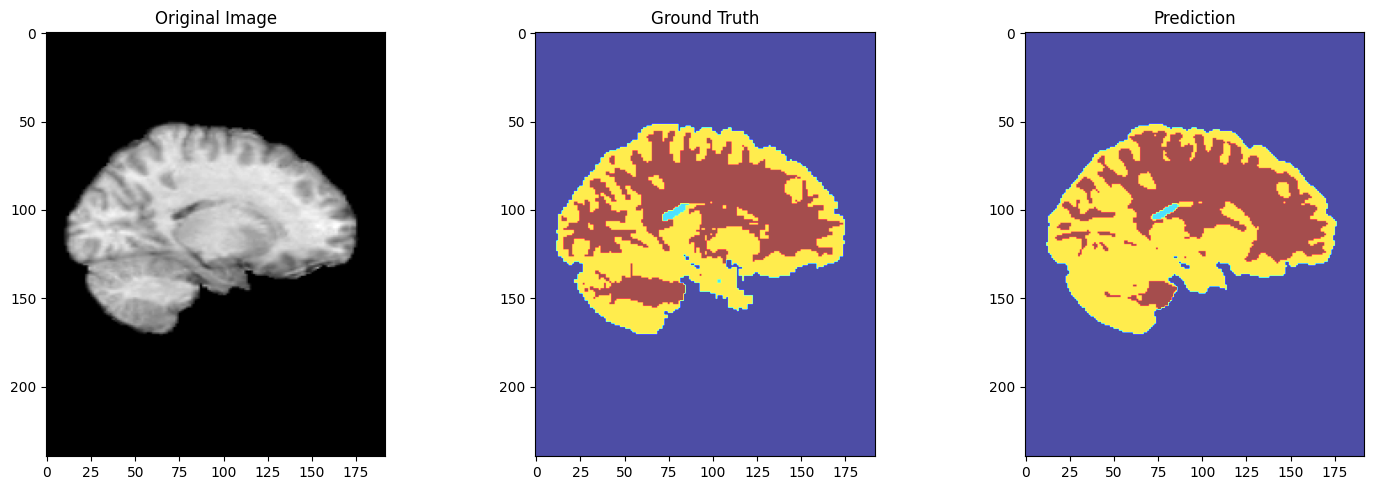

In [18]:
batch = next(iter(dataloader_train))
images, labels = batch

images = images.to(device)
labels = labels.to(device)

model.eval()
with torch.no_grad():
    pred = model(images)
    pred_softmax = F.softmax(pred, dim=1)
    pred_classes = torch.argmax(pred_softmax, dim=1).squeeze(0).cpu()

        

label_slice = labels.squeeze(0).cpu()
classes = {}
perclass, dice_score_mean = dice_coefficient_per_class(pred_classes, label_slice, 4)
classes["BG"] = perclass[0]
classes["CSF"] = perclass[1]
classes["WM"] = perclass[2]
classes["GM"] = perclass[3]
print(f"Mean Dice Score: {dice_score_mean:.4f}")
print(f"Per class dice: ", classes)

# Visualize the image, ground truth, and prediction
plt.figure(figsize=(15, 5))

# Original Image
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow( np.flipud(np.transpose(images.squeeze().cpu().numpy())), cmap="gray")

# Ground Truth
plt.subplot(1, 3, 2)
plt.title("Ground Truth")
plt.imshow( np.flipud(np.transpose(label_slice.numpy())), cmap="jet", alpha=0.7)

# Prediction
plt.subplot(1, 3, 3)
plt.title("Prediction")
plt.imshow( np.flipud(np.transpose(pred_classes.numpy())), cmap="jet", alpha=0.7)

plt.tight_layout()
plt.show()